# Oggetti e riferimenti

*(Sezione 6.1.4 e 6.2.8 del libro di testo)*

Per il resto di questo notebook faremo molti assegnamenti di variabili. Si consiglia di eseguire il notebook una istruzione alla volta, e di guardare il contenuto delle variabili mano a mano che le istruzioni vengono eseguite nel tab `JUPYTER` del pannello in basso (si può premete `Ctrl-J` per far comparire il pannello in basso se al momento non è visibile).

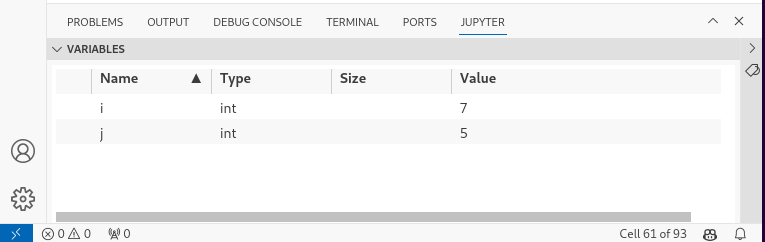

Assegno ad `i` il valore 5.

In [3]:
i = 5

Assegno a `j` lo stesso valore di `i` (cioè 5).


In [4]:
j = i

Incremento `i` di 2. `i` diventa 7, ma `j` giustamente rimane 5.

In [17]:
i = i + 2

Creo adesso una lista `l` contenente le stringhe "a", "b" e "c".

In [7]:
l = [ "a", "b", "c" ]

Copio `l` in `m`, quindi `m` diventa `["a", "b", "c"]`.

In [8]:
m = l

E adesso succede una cosa strana: cambio il valore del primo elemento di `l`, e la modifica si ripercuote in `m`.

In [16]:
l[0] = "ciao"

Se invece cambio tutto `l` con un assegnamento, la modifica resta confinata alla variabile `l`, ed `m` resta invariata.

In [14]:
l = [1, 2, 3]

Adesso le due liste sono separate. Nessuna modifica ad `l` può influenzare `m`. Se cambio il primo valore di `l`, `m` rimane fissa.

In [15]:
l [0] = 333

Facciamo ancora un altro esempio. Reinizializzo `l` e lo copio in `m`.

In [69]:
l = [ "ciao", "sono", "io"]
m = l

Se aggiorno il valore di `l` con il metodo `append`, il nuovo elemento viene aggiunto anche ad `m`.

In [70]:
l.append("xyz")

Ma se aggiungo un elemento usando l'operazione di concatenazione e assegnando il risultato ad `l`, allora la modifica non si ripercuote su `m`.

In [71]:
l = l + ["abc"]

Come è possibile spiegare questo comportamento ?

Quando diciamo che le variabili contengono degli oggetti, stiamo semplificando troppo. In realtà le variabili non contengono direttamente un oggetto, ma un `riferimento` a quell'oggetto, che possiamo pensare come una freccia dal nome della variabile all'oggetto che essa contiene. Tecnicamente, un riferimento è l'indirizzo della locazione di memoria dove risiede l'oggetto (ovviamente l'oggetto può occupare più locazioni se necessario).

Lo spazio di memoria dove risiedono le variabili è solitamente chiamato *interpreter stack*  o solo *stack* (in italiano, pila), mentre lo spazio di memoria adove risiedono gli oggetti è spesso chiamato *heap* (anche se questo termine non è standard in Python).

Supponiamo di dare la seguente serie di istruzioni:
```python
i = 3
j = i
l = [10, 20, 30]
m = l
```
Quello che accade è:
  * viene creato un oggetto contentente il l'oggetto `3`, e la variabile `i` viene fatta puntare a questo oggetto.
  * il riferimento presente in `i` viene copiato in `j`, il risultato è che `j` punta allo stesso oggetto di `i`.
  * viene creata una oggetto contenente la lista `[10, 20, 30]` e la variabile `l` viene fatta puntare ad essa.
  * il puntatore presente in `l` viene copiato in `m`, il risultato è che `m` punta allo stesso oggetto di `l`.

Questa è la rappresentazione grafica della situazione.

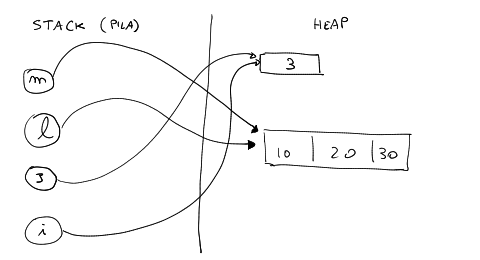

Il fatto che `l` ed `m` si riferiscono allo stesso oggetto si afferma dicendo che `l` ed `m` sono *alias*. In teoria anche `i` e `j` sono alias, ma di solito questo termine non si usa per i tipi interi e gli altri tipi immutabili (vedremo poi cosa vuol dire in dettaglio il termine **immutabile**).

Eseguiamo ora l'istruzione:
```python
l[1] = 99
```
Il risultato è che nell'oggetto puntato da `l`, l'elemento in posizione 1 viene rimpiazzato da 99.

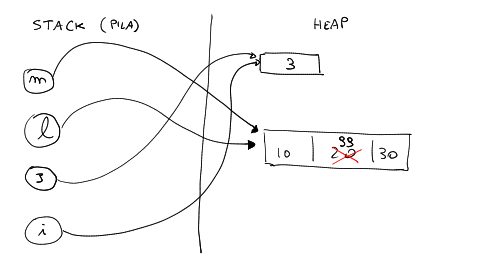

Ma così facendo abbiamo cambiato anche il valore di `m`!!

Nel momento in cui assegnamo ad `l` una nuova lista, con
```python
l = ["Ciao", "ab"]
```
si spezza il legame che la lega ad `m`, e le due variabili si riferiscono a oggetti distinti.

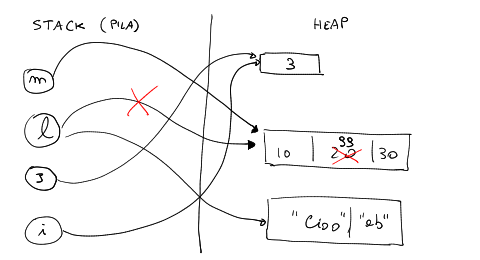

Stessa cosa accade con il metodo `append`. Il metodo modifica l'oggetto di tipo lista a cui è applicato. Supponiamo sia:
```python
l = ["Ciao", "sono"]
m = l
```
Ovvero, si ha questa situazione:

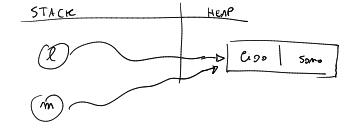

Dopo l'istruzione
```python
l.append(10)
```
otteniamo

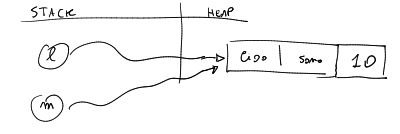

e anche la variabile `m` è stata modificata.

Invece l'istruzione
```python
l = l + [20]
```
fa una cosa completamente diversa: 
  * crea un oggetto nello heap contenente la lista `[20]`, oggetto che non è puntato da alcuna variabile;
  * concatena l'oggetto puntato da `l` con il nuovo oggetto `[20]`, creando una **nuova** lista, senza modificare la lista originaria;
  * camba la variabile `l` in modo che punti alla nuova lista concatenata.
La situazione è dunque:

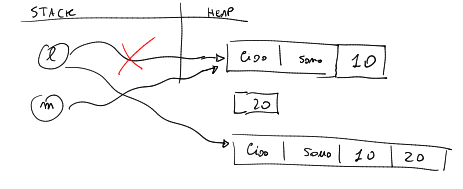

Notare che la stessa situazione si verifica anche per qualunque altro tipo di dato. Ad esempio, 
```python
s = "Ciao"
r = s
k = "Ciao"
```
dà origine alla seguente organizzazione in memoria:

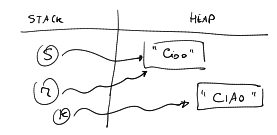

Notare che `s` ed `r` sono alias, mentre `k` punta ad un altro oggetto in memoria, sebbene con lo stesso contenuto del primo. Il motivo però per cui non ci siamo prima interessati della cosa e non ci siamo mai accorti di questo comportamento, è che non esiste nessun modo di alterare un oggetto di tipo stringa una volta che è stato creato. Ad esempio, non è possibile modificare un carattere con una istruzione del tipo `s[0]="T"`. Inoltre, tutti i metodi che operano sulle stringhe non modificano mai la stringa di partenza, ma ne creano una nuova (si pensi, ad esempio, al metodo `upper()` per convertire in maiuscolo).

Poiché non è possibile modificare un oggetto di tipo stringa già presente in memoria, si dice che le stringhe in Python sono un tipo di dato **immutabile**. Lo stesso vale per interi, numeri in virgola mobile, booleani e tutti gli altri tipi che abbiamo già visto tranne il tipo lista e i tipi *GraphicsWindow*, *GraphicsCanvas* e *GraphicsImage* della libreria *ezgraphics*.

## Per maggior precisione

In realtà, anche quella che vi ho presentato sopra è una versione semplificata della realtà. Secondo quanto detto sopra, infatti, sembrerebbe che una lista sia una sequenza di oggetti. Ma in realtà, le liste non contengono una sequenza di oggetti, ma una sequenza di riferimenti. Ad esempio, la istruzioni

```python
l = ["Ciao", 10, 20]
```

non causano in realtà questa organizzazione della memoria:

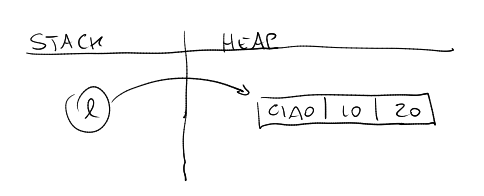

ma quest'altra

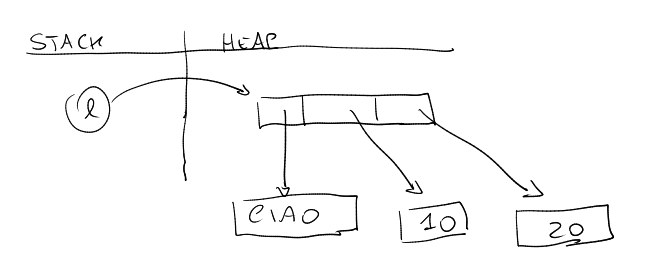

Se a qesto punto diamo il comando 
```python
v = l[1]
```

si ottiene 

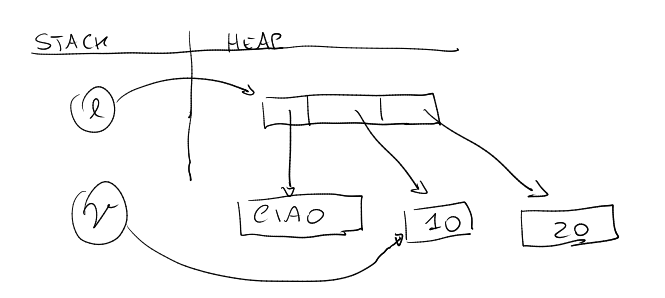

Tuttavia, finché si opera con tipi immutabili, non è un grosso problema pensare che una variabile o una lista contengano direttamente oggetti invece che riferimenti.

## La funzione `id`

In Python ci sono vari modi per determinare se due oggetti sono in realtà lo stesso. Uno di questi è la funzione `id(x)` che restituisce l'*identità* di `x`: è un intero che è garatito essere costante er un oggetto `x`. Se due oggetti sono in realtà lo stesso, il valore restiuito da `id` è uguale. Per CPython (l'implementazione standard di Python) `id` è proprio l'indirizzo in memoria dove risiede l'oggetto.

In [7]:
l = [1,2,3]

In [8]:
id(l)

139782533728576

In [9]:
m = l

Si vede che l'id di `m` e lo stesso di `l` perché le due variabili puntano in realtà alla stessa lista.

In [10]:
id(m)

139782533728576

In [11]:
n = [1,2,3]

Sebbene `n` contenga gli stessi valori di `l` ed `n`, l'istruzione di assegnamento qua sopra crea una lista completamente nuova, quindi il suo `id` è diverso.

In [16]:
id(n)

139782533728448

## Copiare una lista

Abbiamo visto che l'assegnamento tra liste non crea effettivamente una nuova lista, ma soltanto un alias. Se si vuole effettivamente *copiare* una lista, nel senso di generare una **nuova** lista con lo **stesso contenuto**, possiamo procedere come segue.

Se si vuole effettivamente *copiare* una lista, nel senso di generare una **nuova** lista con lo **stesso contenuto**, possiamo costruirci una funzione apposita:

In [ ]:
def copia(l):
    res = []
    for x in l:
        res.append(x)
    return res

La funzione `copia` restituisce una nuova lista con gli stessi argomenti di quella fornita come argomento.

In [ ]:
l1 = copia(l)
# gli id di queste liste sono diversi: vuol dire che si tratta di oggetti distinti
print(id(l), id(l1))

139771859999808 139771860068480


In [ ]:
# le liste l ed l contengono comunque gli stessi elementi
print(l)
print(l1)

Volendo possiamo fare la stessa cosa con l'approccio in cui si costruisce una lista della dimensione giusta e si rimpiazzano gli elementi:

In [ ]:
def copia2(l):
    res = [None] * len(l)
    for i in range(len(l)):
        res[i] = l[i]
    return res

In realtà non c'è bisogno di fare niente di tutto ciò, perché Python mette già a disposizione un paio di modi per copiare una lista: la funzione `list` e il metodo `copy`.

In [ ]:
l1 = l.copy()
l2 = list(l)
# gli id di queste liste sono diversi: vuol dire che si tratta di oggetti distinti
print(id(l), id(l1), id(l2))

139771859999808 139771849496320 139771849501632


In [ ]:
# le liste l1 ed l2 contengono comunque gli stessi elementi di l
print(l1)
print(l2)

['ciao', 'b', 'c']
['ciao', 'b', 'c']


Un altro metodo ancora per copiare una lista è usare la selezione di sottolista. Vi ricordo che `l[a:b]` restituisce la sottolista di `a` ottenuta partendo dall'elemento di indice `a` e terminando con l'elemento di indice `b` (escluso). Se `a` si omette è come mettere `0`, mentre se `b` si omette è come mettere `len(l)`. Pertanto se scriviamo
```python
l[:]
```
la sottolista estratta è tutta la lista `l`, ma si tratta di una copia e non un alias.